In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# #importing dataset

In [8]:
dataset = pd.read_csv("D:/smartintenz ADS files/files/PCA IBM/Flask/household_power_consumption.txt"
                      , sep=';', header = 0, infer_datetime_format=True,
                     parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [9]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [10]:
dataset.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-26 20:58:00,0.946,0,240.43,4,0,0,0.0
2010-11-26 20:59:00,0.944,0,240,4,0,0,0.0
2010-11-26 21:00:00,0.938,0,239.82,3.8,0,0,0.0
2010-11-26 21:01:00,0.934,0,239.7,3.8,0,0,0.0
2010-11-26 21:02:00,0.932,0,239.55,3.8,0,0,0.0


In [11]:
print(f"the Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns")

the Dataset has 2075259 rows and 7 columns


In [12]:
dataset.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

###Checking the null values in each column

In [13]:
dataset.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

### understanding percent of data missing 

In [15]:
percent_missing=dataset.isnull().sum()*100/len(dataset)
missing_value_df=pd.DataFrame({'percent missing':percent_missing})

In [16]:
missing_value_df

,percent missing
Global_active_power,0.000000
Global_reactive_power,0.000000
Voltage,0.000000
Global_intensity,0.000000
Sub_metering_1,0.000000
Sub_metering_2,0.000000
Sub_metering_3,1.251844


### handling missing values

In [17]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN


In [18]:
dataset.replace('?',np.nan,inplace=True)

In [19]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dataset=dataset.dropna(how='all')

In [21]:
for i in dataset.columns:
    dataset[i]=dataset[i].astype('float64')

In [22]:
dataset.shape

(2049280, 7)

### adding another sub_metering_4 column

In [23]:
values = dataset.values
dataset['sub_metering_4'] = (values[:,0]*1000/60) - (values[:,4]+ values[:,5]+ values[:,6])


In [24]:
dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
sub_metering_4           float64
dtype: object

In [26]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


### data Visalization

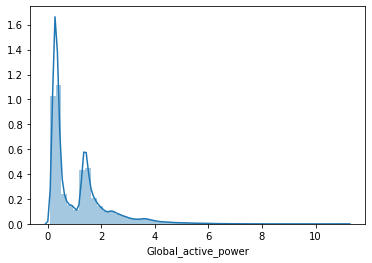

In [28]:
sns.distplot(dataset['Global_active_power'])

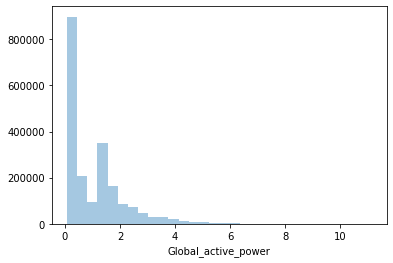

In [30]:
sns.distplot(dataset['Global_active_power'],kde=False,bins=30)

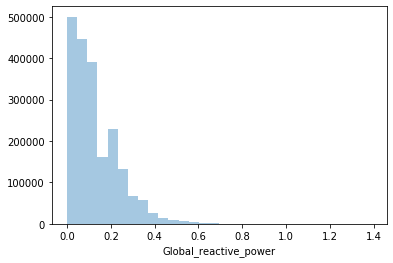

In [31]:
sns.distplot(dataset['Global_reactive_power'],kde=False,bins=30)

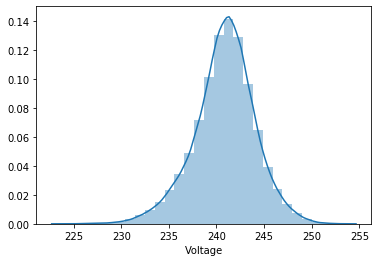

In [32]:
sns.distplot(dataset['Voltage'],kde=True,bins=30)

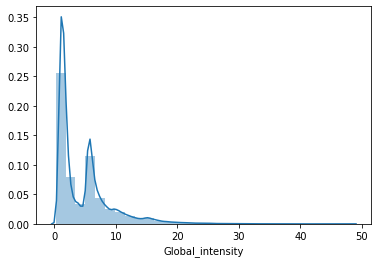

In [33]:
sns.distplot(dataset['Global_intensity'],kde=True,bins=30)

### correlation of dataset values

In [34]:
dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


### analysis using heatmap

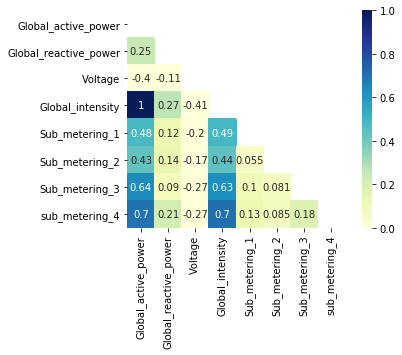

In [51]:
pearson=dataset.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pearson, vmax=1,vmin=0,square=True,cbar=True,annot=True,cmap="YlGnBu",mask=mask);

### data visualisation 

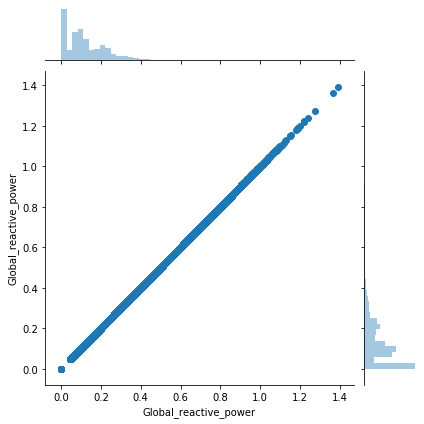

In [54]:
sns.jointplot( x = 'Global_reactive_power',y = 'Global_reactive_power', data = dataset, kind = 'scatter')

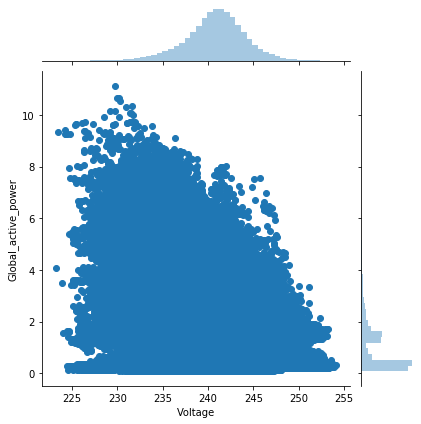

In [55]:
sns.jointplot( x = 'Voltage', y = 'Global_active_power', data = dataset, kind = 'scatter')

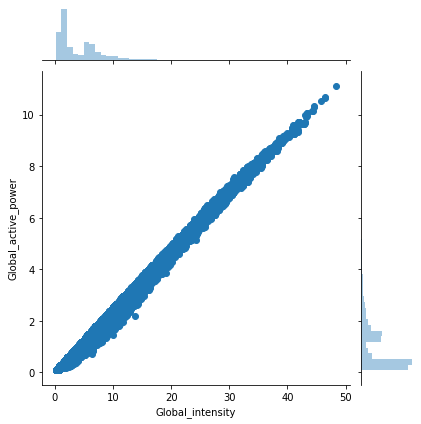

In [56]:
sns.jointplot( x = 'Global_intensity', y = 'Global_active_power', data = dataset, kind = 'scatter')

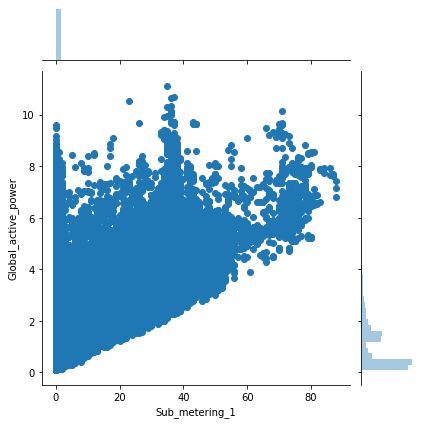

In [57]:
sns.jointplot( x = 'Sub_metering_1', y = 'Global_active_power', data = dataset, kind = 'scatter')

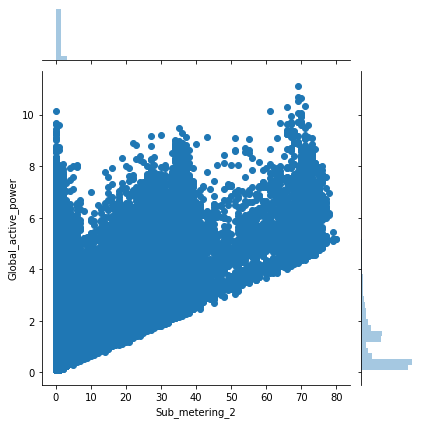

In [60]:
sns.jointplot( x = 'Sub_metering_2', y = 'Global_active_power', data = dataset, kind = 'scatter')

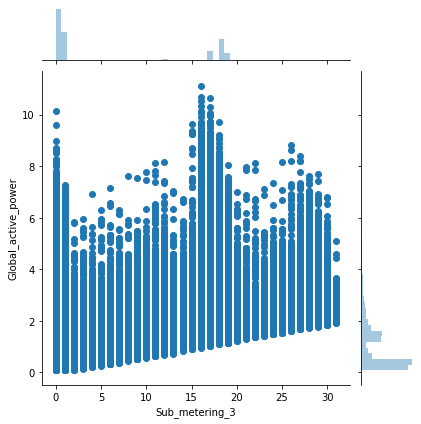

In [61]:
sns.jointplot( x = 'Sub_metering_3', y = 'Global_active_power', data = dataset, kind = 'scatter')

In [73]:
y.head()

NameError: name 'y' is not defined